# Project: FBI Gun Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset consisting of two files. The first file contains a data represent the number of firearm background checks, the second file describe census in U.S.


### Question(s) for Analysis
> <ol>
    <li>Dose the changing of number of Housing units has a positive relation with changing in total guns?</li>
    <li>What is the state that has higher Population percent change from April 1, 2010 (estimates base) to July 1, 2016?</li>
  </ol>

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

### General Properties

#### Loading gun_data.xlsx and assessing

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_gun = pd.read_excel('Database_Ncis_and_Census_data/gun_data.xlsx')
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


> We may need to split years and months in two columns

In [3]:
df_gun.tail()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
12480,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
12481,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
12482,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
12483,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241
12484,1998-11,Wyoming,8.0,NaN,45.0,49.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107


In [4]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

> Where there are a lot of missing values let us check if missing values affect on totals

In [5]:
df_gun_null = df_gun[df_gun.isna().any(axis=1)]
((df_gun_null['totals'] - df_gun_null[df_gun.columns[2:-1]].sum(axis=1)) != 0).sum()

0

> We can see that there is no difference between 'totals' and the sum of columns in the rows that have missing values, so we can replace missing with 0.

In [6]:
df_gun.duplicated().sum()

0

> There is no duplicated data

#### Loading US_Census_Data.csv and assessing

In [7]:
df_census = pd.read_csv('Database_Ncis_and_Census_data/US_Census_Data.csv')
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


> We need to transpose our data because each column should has one type of data

In [8]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

> We will need to change the data type and data format for all facts 

In [9]:
df_census.shape

(85, 52)

In [10]:
df_census[df_census['Fact Note'].notna()]

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
12,"White alone, percent, July 1, 2016, (V2016)",(a),69.30%,66.10%,83.30%,79.40%,72.70%,87.50%,80.60%,70.10%,...,0.852,0.787,79.40%,91.10%,94.60%,70.00%,80.00%,93.60%,87.50%,92.80%
13,"Black or African American alone, percent, July...",(a),26.80%,3.80%,4.90%,15.70%,6.50%,4.50%,11.80%,22.60%,...,0.02,0.171,12.60%,1.40%,1.30%,19.80%,4.10%,3.60%,6.60%,1.30%
14,"American Indian and Alaska Native alone, perce...",(a),0.70%,15.20%,5.40%,1.00%,1.70%,1.60%,0.50%,0.60%,...,0.09,0.004,1.00%,1.60%,0.40%,0.50%,1.90%,0.20%,1.10%,2.70%
15,"Asian alone, percent, July 1, 2016, (V2016)",(a),1.40%,6.30%,3.40%,1.60%,14.80%,3.30%,4.70%,4.00%,...,0.015,0.018,4.80%,2.50%,1.80%,6.60%,8.60%,0.80%,2.80%,1.00%
16,Native Hawaiian and Other Pacific Islander alo...,(a),0.10%,1.30%,0.30%,0.30%,0.50%,0.20%,0.10%,0.10%,...,0.001,0.001,0.10%,1.00%,Z,0.10%,0.80%,Z,0.10%,0.10%
18,"Hispanic or Latino, percent, July 1, 2016, (V...",(b),4.20%,7.00%,30.90%,7.30%,38.90%,21.30%,15.70%,9.20%,...,0.037,0.052,39.10%,13.80%,1.90%,9.10%,12.40%,1.50%,6.70%,10.00%
40,"Total accommodation and food services sales, 2...",(c),"7,576,462","2,221,335","13,996,635","4,307,264","90,830,372","13,617,654","9,542,068","2,148,437",...,1873699,12499013,"54,480,811","4,789,281","1,564,272","17,795,901","14,297,278","4,036,333","10,303,256","1,644,844"
41,Total health care and social assistance receip...,(c),"26,039,632","6,375,483","37,055,881","15,792,628","248,953,592","29,488,161","29,573,119","7,003,251",...,6211731,42383683,"145,035,130","14,521,857","4,457,996","47,705,003","43,966,889","12,259,395","40,680,625","3,291,478"
42,"Total manufacturers shipments, 2012 ($1,000)",(c),"124,809,759",D,"51,243,473","62,712,925","512,303,164","50,447,098","55,160,095","22,597,384",...,16882647,139960482,"702,603,073","50,046,429","9,315,494","96,389,872","131,530,601","24,553,072","177,728,926","10,783,794"
43,"Total merchant wholesaler sales, 2012 ($1,000)",(c),"57,746,565","5,216,303","69,437,272","31,256,110","666,652,186","77,034,971","161,962,244","5,628,914",...,20411059,111718421,"691,242,607","30,927,885","6,450,076","86,613,641","83,313,366","14,295,437","77,066,883","5,597,891"


In [11]:
df_census.tail(25)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
60,"Veteran-owned firms, 2012",NaN,"41,943","7,953","46,780","25,915","252,377","51,722","31,056","7,206",...,8604,59379,"213,590","18,754","8,237","76,434","49,331","12,912","39,830","6,470"
61,"Nonveteran-owned firms, 2012",NaN,"316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318",...,66219,469392,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"
62,"Population per square mile, 2010",NaN,94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,"Land area in square miles, 2010",NaN,"50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"
64,FIPS Code,NaN,"""01""","""02""","""04""","""05""","""06""","""08""","""09""","""10""",...,"""46""","""47""","""48""","""49""","""50""","""51""","""53""","""54""","""55""","""56"""
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,NOTE: FIPS Code values are enclosed in quotes ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,Value Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,1,Includes data not distributed by county.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> There are a litters between data that we have to replace with an appropriate value.
Also We will need to move last 20 rows and with first two columns to anther dataframe, then drop 'Fact Note' column

### Data Cleaning

#### Cleaning gun_data.xlsx
> <ol>
    <li>Replace missing values with 0</li>
    <li>Split years and months</li>
  </ol>

In [12]:
df_gun.fillna(0, inplace=True)

In [13]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12485 non-null float64
permit_recheck               12485 non-null float64
handgun                      12485 non-null float64
long_gun                     12485 non-null float64
other                        12485 non-null float64
multiple                     12485 non-null int64
admin                        12485 non-null float64
prepawn_handgun              12485 non-null float64
prepawn_long_gun             12485 non-null float64
prepawn_other                12485 non-null float64
redemption_handgun           12485 non-null float64
redemption_long_gun          12485 non-null float64
redemption_other             12485 non-null float64
returned_handgun             12485 non-null float64
returned_long_gun            12485 non-null float64
returned_ot

In [14]:
df_gun['date'] = pd.to_datetime(df_gun['month'])
df_gun['year'] = df_gun['date'].dt.year
df_gun['month'] = df_gun['date'].dt.month
df_gun['long_month'] = df_gun['date'].dt.strftime('%B')

In [15]:
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,date,year,long_month
0,9,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,9.0,16.0,3.0,0.0,0.0,3.0,32019,2017-09-01,2017,September
1,9,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,17.0,24.0,1.0,0.0,0.0,0.0,6303,2017-09-01,2017,September
2,9,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,38.0,12.0,2.0,0.0,0.0,0.0,28394,2017-09-01,2017,September
3,9,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,13.0,23.0,0.0,0.0,2.0,1.0,17747,2017-09-01,2017,September
4,9,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,123506,2017-09-01,2017,September


In [16]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 30 columns):
month                        12485 non-null int64
state                        12485 non-null object
permit                       12485 non-null float64
permit_recheck               12485 non-null float64
handgun                      12485 non-null float64
long_gun                     12485 non-null float64
other                        12485 non-null float64
multiple                     12485 non-null int64
admin                        12485 non-null float64
prepawn_handgun              12485 non-null float64
prepawn_long_gun             12485 non-null float64
prepawn_other                12485 non-null float64
redemption_handgun           12485 non-null float64
redemption_long_gun          12485 non-null float64
redemption_other             12485 non-null float64
returned_handgun             12485 non-null float64
returned_long_gun            12485 non-null float64
returned_oth

In [17]:
df_gun['month'].unique()

array([ 9,  8,  7,  6,  5,  4,  3,  2,  1, 12, 11, 10])

#### Cleaning US_Census_Data.csv
> <ol>
    <li>Move notes</li>
    <li>Drop columns that we not need</li>
    <li>Drop rows that we not need</li>
    <li>Transpose data</li>
    <li>Check missing values and clean it</li>
    <li>Change data format</li>
    <li>Change data types</li>
  </ol>

In [18]:
df_census_notes = df_census.iloc[-20:,:2].copy()
df_census_notes.reset_index(drop=True, inplace=True)

In [19]:
df_census.drop(columns='Fact Note', inplace=True)

In [20]:
df_census.drop(df_census.index[-20:], inplace=True)
df_census.tail()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
60,"Veteran-owned firms, 2012","41,943","7,953","46,780","25,915","252,377","51,722","31,056","7,206","185,756",...,8604,59379,"213,590","18,754","8,237","76,434","49,331","12,912","39,830","6,470"
61,"Nonveteran-owned firms, 2012","316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318","1,846,686",...,66219,469392,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"
62,"Population per square mile, 2010",94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,350.6,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,"Land area in square miles, 2010","50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54","53,624.76",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"
64,FIPS Code,"""01""","""02""","""04""","""05""","""06""","""08""","""09""","""10""","""12""",...,"""46""","""47""","""48""","""49""","""50""","""51""","""53""","""54""","""55""","""56"""


In [21]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 0 to 64
Data columns (total 51 columns):
Fact              65 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota         65 non-null object
Mississip

In [22]:
df_census = df_census.transpose()

In [23]:
df_census.columns = df_census.iloc[0]
df_census.drop('Fact', axis=0, inplace=True)

In [24]:
df_census.reset_index(inplace=True)
df_census.rename(columns={'index':'state'}, inplace=True)
df_census.rename_axis(None, axis=1, inplace=True)

In [25]:
df_census.head()

,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
1,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
2,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
3,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
4,California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""


> Search for litters from df_census_notes dataframe in df_census

In [26]:
df_census_notes

,Fact,Fact Note
0,NaN,NaN
1,NOTE: FIPS Code values are enclosed in quotes ...,NaN
2,NaN,NaN
3,Value Notes,NaN
4,1,Includes data not distributed by county.
5,NaN,NaN
6,Fact Notes,NaN
7,(a),Includes persons reporting only one race
8,(b),"Hispanics may be of any race, so also are incl..."
9,(c),Economic Census - Puerto Rico data are not com...


> Where the value 'D' means 'Suppressed to avoid disclosure of confidential information', we cant replace it with any value so I will drop this rows.<br>
Where the value 'FN' means 'Footnote on this item in place of data', we cant replace it with any value so I will drop this rows.<br>
Where the value 'S' means 'Suppressed; does not meet publication standards', we cant replace it with any value so I will drop this rows.<br>
Where the value 'X' means 'Not applicable', we cant replace it with any value so I will drop this rows.<br>
Where the value 'Z' means 'Value greater than zero but less than half unit of measure shown', I will replace it with 0.005

In [27]:
df_census[df_census[df_census == 'D'].any(axis=1)].index

Int64Index([1, 10], dtype='int64')

In [28]:
indx = df_census[df_census[df_census == 'D'].any(axis=1)].index
df_census.drop(index=indx, inplace=True)
df_census[df_census[df_census == 'D'].any(axis=1)].shape

(0, 66)

In [29]:
df_census[df_census[df_census == 'FN'].any(axis=1)].index

Int64Index([49], dtype='int64')

In [30]:
indx = df_census[df_census[df_census == 'FN'].any(axis=1)].index
df_census.drop(index=indx, inplace=True)
df_census[df_census[df_census == 'FN'].any(axis=1)].shape

(0, 66)

In [31]:
df_census[df_census[df_census == 'S'].any(axis=1)].index

Int64Index([], dtype='int64')

In [32]:
df_census[df_census[df_census == 'X'].any(axis=1)].index

Int64Index([], dtype='int64')

In [33]:
df_census[df_census[df_census == 'Z'].any(axis=1)]

,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
18,Maine,"1,331,479","1,328,364",0.20%,"1,328,361",4.90%,5.20%,19.10%,20.70%,19.40%,...,"139,570","79,243","42,067","4,339","131,322","15,689","115,839",43.1,"30,842.92","""23"""
21,Michigan,"9,928,300","9,884,129",0.40%,"9,883,640",5.80%,6.00%,22.10%,23.70%,16.20%,...,"834,087","446,128","306,986","158,946","657,237","71,861","733,517",174.8,"56,538.90","""26"""
44,Vermont,"624,594","625,741",-0.20%,"625,741",4.90%,5.10%,19.00%,20.70%,18.10%,...,"75,827","41,270","23,417","2,354","70,491","8,237","63,317",67.9,"9,216.66","""50"""
47,West Virginia,"1,831,102","1,853,011",-1.20%,"1,852,994",5.50%,5.60%,20.50%,20.90%,18.80%,...,"114,435","63,112","39,065","5,777","104,785","12,912","94,960",77.1,"24,038.21","""54"""


In [34]:
has_Z = df_census.apply(lambda data: data.str.contains('Z').any(axis=0))
df_census.loc[:, has_Z].head()

,"Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)"
0,0.10%
2,0.30%
3,0.30%
4,0.50%
5,0.20%


In [35]:
df_census.loc[df_census['Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)'] == 'Z', 'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)'] = '0.005'

In [36]:
df_census[df_census[df_census == 'Z'].any(axis=1)].index

Int64Index([], dtype='int64')

> Search for columns that have comma thousands separators

In [37]:
has_commas = df_census.apply(lambda data: data.str.contains(',').any(axis=0))

> Now remove commas

In [38]:
df_census.loc[:, has_commas] = df_census.loc[:, has_commas].apply(lambda data: data.str.replace(',', ''),)

> Search for $

In [39]:
has_dollar = df_census.apply(lambda data: data.str.contains('$').any(axis=0))

> Now remove commas

In [40]:
df_census.loc[:, has_dollar] = df_census.loc[:, has_dollar].apply(lambda data: data.str.replace('$', ''))

> Search for %, remove it and change format

In [41]:
has_per = df_census.apply(lambda data: data.str.contains('%').any(axis=0))

In [42]:
df_census.loc[:, has_per].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 48
Data columns (total 29 columns):
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)     47 non-null object
Persons under 5 years, percent, July 1, 2016,  (V2016)                                    47 non-null object
Persons under 5 years, percent, April 1, 2010                                             47 non-null object
Persons under 18 years, percent, July 1, 2016,  (V2016)                                   47 non-null object
Persons under 18 years, percent, April 1, 2010                                            47 non-null object
Persons 65 years and over, percent,  July 1, 2016,  (V2016)                               47 non-null object
Persons 65 years and over, percent, April 1, 2010                                         47 non-null object
Female persons, percent,  July 1, 2016,  (V2016)                                          47 non-null object
Female persons, percent, 

> there is no missing values

In [43]:
row_has_per = df_census.loc[df_census[df_census.loc[:, has_per].columns[0]].str.contains('%')].copy()
row_has_per.loc[:, has_per] = row_has_per.loc[:, has_per].apply(lambda data: (data.str.replace('%', '').astype(float))/100)

> Fix index

In [44]:
df_census.drop(index=row_has_per.index, inplace=True)
df_census = df_census.append(row_has_per)

In [45]:
df_census.sort_index(inplace=True)
df_census.reset_index(inplace=True)
df_census.drop(columns='index', inplace=True)

> Finaly, change data types

In [46]:
for col in df_census.columns[1:-1]:
    df_census[col] = pd.to_numeric(df_census[col])

In [47]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 66 columns):
state                                                                                     47 non-null object
Population estimates, July 1, 2016,  (V2016)                                              47 non-null int64
Population estimates base, April 1, 2010,  (V2016)                                        47 non-null int64
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)     47 non-null float64
Population, Census, April 1, 2010                                                         47 non-null int64
Persons under 5 years, percent, July 1, 2016,  (V2016)                                    47 non-null float64
Persons under 5 years, percent, April 1, 2010                                             47 non-null float64
Persons under 18 years, percent, July 1, 2016,  (V2016)                                   47 non-null float64
Persons under 18 years, 

<a id='eda'></a>
## Exploratory Data Analysis


### Dose the changing of number of Housing units has a positive relation with changing in total guns?

In [48]:
indx = df_gun.query('state not in {}'.format(list(df_census['state']))).index
gun_state = df_gun.drop(index=indx).groupby(['state', 'year', 'month'])['totals'].mean().reset_index()

In [49]:
gun_10 = gun_state['totals'][(gun_state['year']==2010) & (gun_state['month']==4)].copy().reset_index().drop(columns='index')
gun_16 = gun_state['totals'][(gun_state['year']==2016) & (gun_state['month']==7)].copy().reset_index().drop(columns='index')
gun_chng = gun_16 - gun_10

In [50]:
hous_unt_chng = df_census['Housing units,  July 1, 2016,  (V2016)'] - df_census['Housing units, April 1, 2010']

In [51]:
change = gun_chng
change.rename(columns={'totals':'gun_change'}, inplace=True)
change['housing_units_change'] = hous_unt_chng

In [52]:
def drow_box_plot(df, col, size=(8, 8), title='Box Plot'):
    plt.figure(figsize=(size[0], size[1]))
    plt.title(title)
    plt.boxplot(df[col])

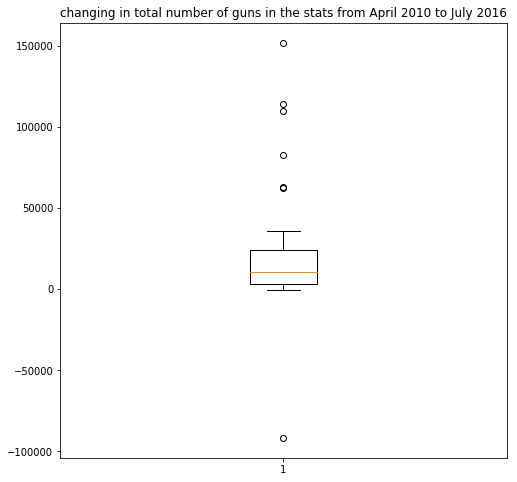

In [53]:
drow_box_plot(change, 'gun_change', title='changing in total number of guns in the stats from April 2010 to July 2016')

> most of states have seen a huge increasing in totals guns from April 2010 to July 2016.

In [54]:
gun_yearly_totals = gun_state.groupby(['state', 'year'])['totals'].sum().unstack('state')
gun_yearly_totals.head()

state,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Idaho,...,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin
year,,,,,,,,,,,,,,,,,,,,,
1998,36568,17453,21752,67445,23798,6870,2135,32341,3819,7339,...,9565,2751,24773,82399,10682,2116,25194,12002,14194,15442
1999,246756,173548,184616,883144,257308,87209,17594,279700,409810,79914,...,145493,31327,264214,710025,77718,22218,208554,133674,134471,179340
2000,221911,148263,169628,794506,307512,87586,15347,266035,352357,77138,...,128618,36723,234673,662970,67420,20300,188508,134255,128258,180492
2001,230187,147582,166062,854569,348696,89689,16619,303396,325521,75400,...,132781,40861,230779,672746,67518,20657,196181,161380,138421,181798
2002,221008,142260,153424,684390,183754,93598,16388,288848,285201,74062,...,121976,44282,223048,664745,61710,20483,191789,193439,134846,173779


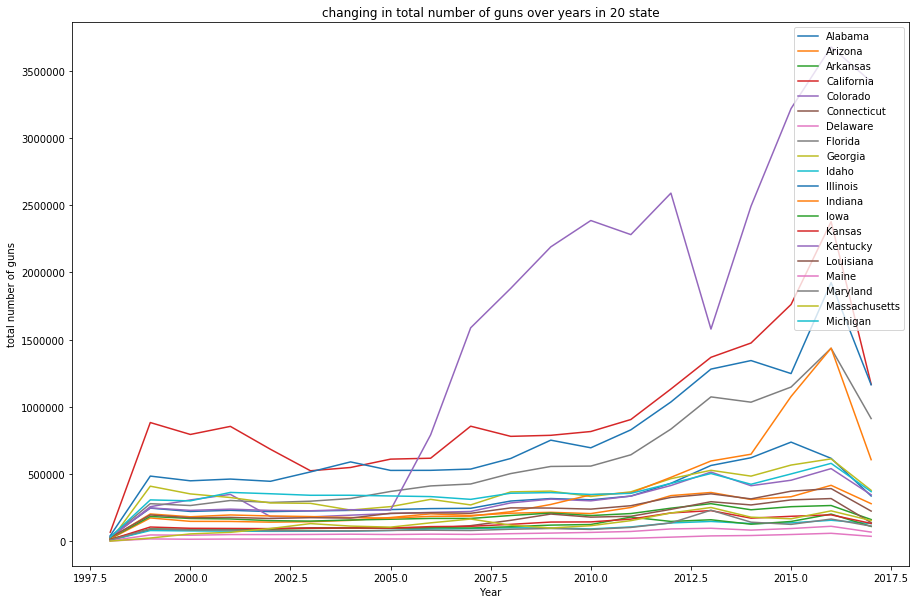

In [55]:
plt.figure(figsize=(15, 10))
plt.plot(gun_yearly_totals.iloc[:,:20])
plt.xlabel('Year')
plt.ylabel('total number of guns')
plt.title('changing in total number of guns over years in 20 state')
plt.legend(gun_yearly_totals.iloc[:,:20].columns, loc=1);

> From 2006, the total number of gun started to increase significantly, especially in Kentucky

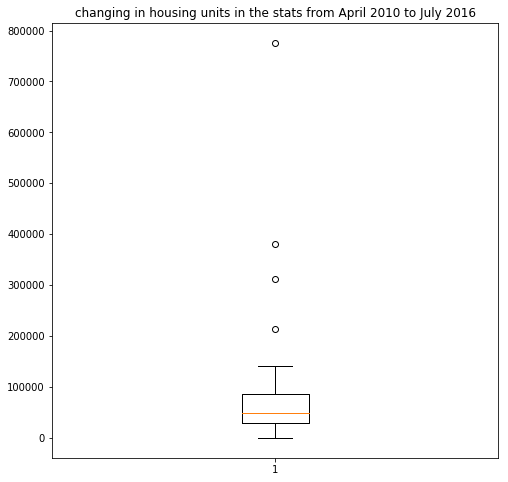

In [56]:
drow_box_plot(change, 'housing_units_change', title='changing in housing units in the stats from April 2010 to July 2016')

> most of states have seen a huge increasing in housing units from April 2010 to July 2016.

In [57]:
gun_yearly_totals_10_16 = gun_state.query('year in ["2010", "2016"]').groupby(['state', 'year'])['totals'].sum().unstack('year')
gun_per_change = gun_yearly_totals_10_16.pct_change(axis='columns').mul(100)[2016].rename('percent_change_(%)').to_frame()
gun_per_change.head()

,percent_change_(%)
state,
Alabama,99.913482
Arizona,102.028149
Arkansas,38.948435
California,191.177108
Colorado,79.680207


In [58]:
hous_unt_chng_per_change = df_census[['Housing units, April 1, 2010', 'Housing units,  July 1, 2016,  (V2016)']].set_index(df_census['state'])
hous_unt_chng_per_change = hous_unt_chng_per_change.pct_change(axis='columns').mul(100)['Housing units,  July 1, 2016,  (V2016)'].rename('percent_change_(%)').to_frame()
hous_unt_chng_per_change.head()

,percent_change_(%)
state,
Alabama,2.685817
Arizona,4.094777
Arkansas,2.922056
California,2.781007
Colorado,5.703833


In [59]:
change.drop(index = change[change['gun_change'] == change['gun_change'].min()].index[0], inplace=True)

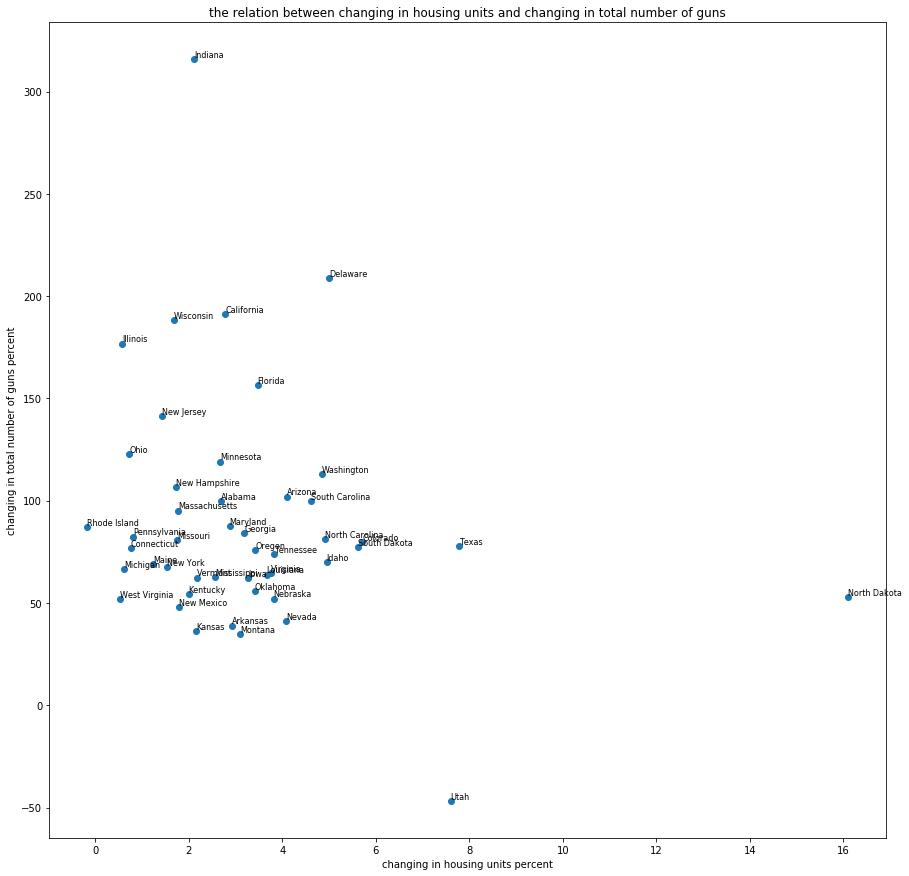

In [60]:
plt.figure(figsize=(15, 15))
plt.xlabel('changing in housing units percent')
plt.ylabel('changing in total number of guns percent')
plt.title('the relation between changing in housing units and changing in total number of guns')
plt.scatter(hous_unt_chng_per_change['percent_change_(%)'], gun_per_change['percent_change_(%)'])
for state, house, gun in zip(gun_per_change.index, hous_unt_chng_per_change['percent_change_(%)'], gun_per_change['percent_change_(%)']):
    plt.annotate(state, (house, gun), ha='left', va='bottom', fontsize=8);

> there are a positive relation between changing in housing units and changing in total number of guns

### What is the state that has higher Population percent change from April 1, 2010 (estimates base) to July 1, 2016?

In [61]:
sorted_census = df_census.sort_values('Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)', ascending=False)
sorted_census.set_index('state', inplace=True)

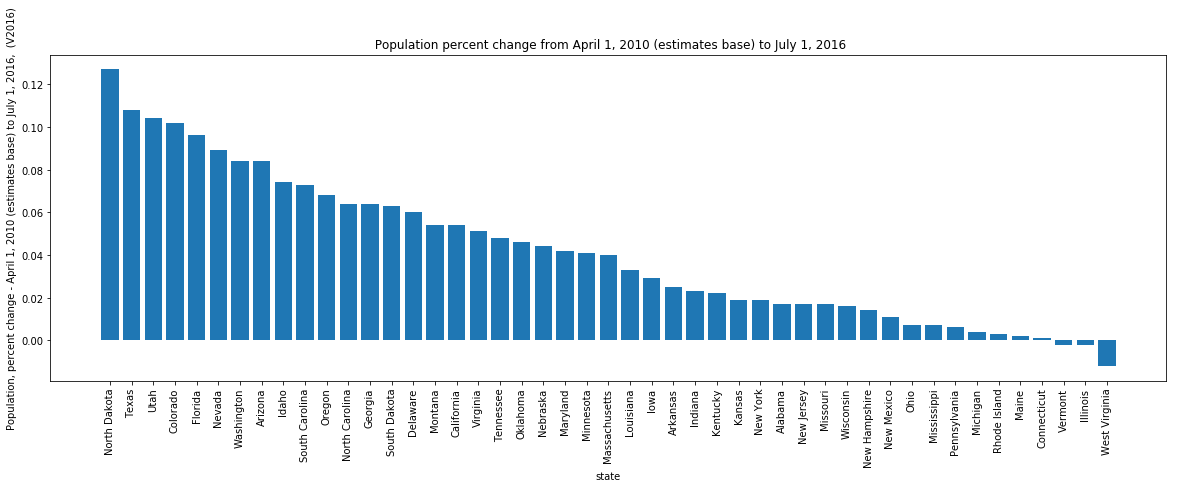

In [62]:
plt.figure(figsize=(20, 6))
x = np.arange(len(sorted_census['Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)']))
y = list(sorted_census['Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)'])
plt.bar(x, y)
plt.xticks(x, sorted_census.index, rotation=90)
plt.xlabel('state')
plt.ylabel('Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)')
plt.title(' Population percent change from April 1, 2010 (estimates base) to July 1, 2016')
plt.show();

>Note that North Dakota has the highest Population percent change from April 1, 2010 (estimates base) to July 1, 2016.

<a id='conclusions'></a>
## Conclusions

> This data is about infinite population, so this data could be inaccurate.

> From April 2010 to July 2016, U.S. has watched a huge increasing in total number of guns and housing units, not in all stats but most of them.<br> And there are a positive relation between total number of guns and housing units.

>From 2006, the total number of gun started to increase significantly, especially in Kentucky

> North Dakota has the highest Population percent change from April 2010 (estimates base) to July 2016. On the other hand, Vermont, Illinois and West Virginia have seen a decreasing in Population.

In [63]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0